X:
 [[ 0.          0.        ]
 [ 0.06625287  0.08919774]
 [ 0.16684926  0.14677889]
 [ 0.31483862  0.10948862]
 [ 0.43818925 -0.07430372]
 [ 0.48655579 -0.26815189]
 [ 0.37255573 -0.55285321]
 [ 0.0813637  -0.77351032]
 [-0.43144644 -0.77715985]
 [-0.6636581  -0.74803604]
 [-0.         -0.        ]
 [-0.11106351 -0.00325206]
 [-0.21855156  0.04022351]
 [-0.28067082  0.17981936]
 [-0.2251272   0.38320831]
 [-0.02119135  0.55515124]
 [ 0.39661513  0.53585528]
 [ 0.61738276  0.47305052]
 [ 0.8022482   0.38278098]
 [ 0.99981376  0.01929896]
 [ 0.          0.        ]
 [ 0.07750853 -0.07961223]
 [ 0.13664754 -0.17524316]
 [-0.06608519 -0.32671679]
 [-0.25702254 -0.36258831]
 [-0.4613563  -0.30950337]
 [-0.66329385 -0.06697547]
 [-0.77736881  0.02521918]
 [-0.6422478   0.6145252 ]
 [-0.58245155  0.81286542]]
y:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


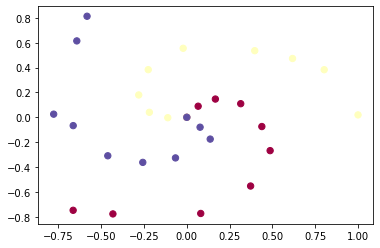

In [ ]:
"""Complete implementation of spiral data-set in 2-dimension. Classification of 
N-number of data-set into 3 class[r,g,y]. We here code a no hidden layer neural 
network using the softmax linear classifier. Here, the training accuracy 28% is for 
performing the gradient descent once. When we iterate over many gradient descent
we get higher accuracy like 49%-55% in colab file "Putting all together for softmax 
classifier".
"""
import numpy as np
import matplotlib.pyplot as plt
N=10 #number of data-points for each class
D=2 #Dimensionality
K=3 #number of class [r,b,y]
X=np.zeros((N*K,D)) #[300,2]Every data-points(N*K) is converted into D-dimension i.e 2-D 
y=np.zeros((N*K),dtype='uint8') #[300]label or assigning class to every data-point

#1 Genrating the spiral data-set for 3 classes
for j in range(K):        #Looping over the 3 classes
  ix= range(N*j,N*(j+1))  #Dividing the dataset as (0,100) (100,200) (200,300)
  r=np.linspace(0.0,1,N)  #Assigning the radius for every N data-points
  t_0=np.random.randn(N)*0.2 #Theta value I don't know why multiplied by 0.2
  t=np.linspace(j*4,(j+1)*4,N)+ t_0 #linspace divides (start to end)number n times
  """t_1=r*np.sin(t)                #Here (0 to 4) is divided 100 times
  t_2=r*np.cos(t)
  print(t_1)
  print(t_2)"""
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j   #1-D array where all the data-points are assigned with their correct class
              #Here,the data-points from(0,100) is assigned as 0,(100,200) as 1 and(200,300) as 2
print("X:\n",X)
print("y:\n",y)
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c =y, s=40, cmap=plt.cm.Spectral) #[:,0]=[1st_row:last_row,column_0] or values in column 0 from all rows

plt.show()

In [ ]:
print(X[:,0].min())

-0.7773688084618031


In [ ]:
#2 Initialization of parameters
"""Softmax classifier has a linear score function and it uses cross-entropy loss.
"""
W=0.01*np.random.randn(D,K) #[2,3]
b=np.zeros((1,K))           #[1,K]

print("W:",W)
#print("b:",b)
scores=np.dot(X,W)+b        #[300,3]
print("Scores:\n",scores)
print("The score is of size:",scores.shape)

W: [[ 0.00913539 -0.00435121 -0.00341022]
 [-0.00085089 -0.00738677  0.00286817]]
Scores:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.29348817e-04 -9.47163504e-04  2.98967917e-05]
 [ 1.39934131e-03 -1.81021826e-03 -1.48007155e-04]
 [ 2.78301209e-03 -2.17869606e-03 -7.59638792e-04]
 [ 4.06625516e-03 -1.35778810e-03 -1.70743917e-03]
 [ 4.67304541e-03 -1.36328596e-04 -2.42836872e-03]
 [ 3.87385864e-03  2.46273359e-03 -2.85617368e-03]
 [ 1.40145932e-03  5.35971483e-03 -2.49602483e-03]
 [-3.28015758e-03  7.61801695e-03 -7.57694566e-04]
 [-5.42628352e-03  8.41328741e-03  1.17731270e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.01184168e-03  5.07282752e-04  3.69424041e-04]
 [-2.03078010e-03  6.53841491e-04  8.60677612e-04]
 [-2.71704425e-03 -1.07027493e-04  1.47290235e-03]
 [-2.38269242e-03 -1.85109747e-03  1.86683949e-03]
 [-6.65962293e-04 -4.00856831e-03  1.66453341e-03]
 [ 3.16728287e-03 -5.68399657e-03  1.84375465e-04]
 [ 5.23752169e-03 -6.18067808e-03 -7.48626

In [ ]:
#3 Computation of loss
"""Quantification of unhappiness with the computed class scores. As we want the 
correct class to have higher scores hence, the loss should be low. In softmax, 
the score function is holding the unnormalized probabilities and we convert it to
normalized probabilities(exponentiate) which is between 0 to 1. Now, log(0)=1=loss
and log(1)=0=loss i.e higher the score lower the score.
"""
#Computation of data-loss
num_example=X.shape[0] #Total_N=N*k=300
exp_scores=np.exp(scores)
exp_sum=np.sum(exp_scores,axis=1,keepdims=True) #[300,1]sum by row of the exponentaited 
#print(exp_sum.shape)      #scores with keepdims to make matrix 2-D
probs=exp_scores/exp_sum  #[300,3]As both matrix are in correct shapes now we can divide
print("Probs:\n",probs)              #The probs contains with normalized class probabilities for all data-points
print("The probs is of size:",probs.shape)

"""As each row contains the class probabilities for every data-point, correct_logprob
is a 1-D array with just the probabilities assigned to the correct class for each row(example).
probs[range(num_example),y] takes the correct probability from each row. As y=0,1,2 
represents [r,b,y], (0,0) to (100,0) element is the correct probabbility for y=0 and
(100,1) to (200,1) for y=1 and (200,2) to (300,2) for y=2
"""
correct_probs=probs[range(num_example),y]
print("Correct probs:\n",correct_probs)
correct_logprobs= -np.log(correct_probs)
print("Correct log probs:\n",correct_logprobs) #[300]
print("The size of correct probs is:",correct_logprobs.shape)

data_loss=np.sum(correct_logprobs)/num_example
print("Data_loss:",data_loss)

#Compuatation of regularization
reg=1e-3
reg_loss= 0.5*reg*np.sum(W*W) #reg=lamda this is regularizarion loss using L2 norm.                 
                              #this discourages large weights through element-wise quadratic penalty
print("Reg_loss:",reg_loss)                 
#Compute the total loss
loss=data_loss + reg_loss
print("Total loss:",loss)
  

Probs:
 [[0.33333333 0.33333333 0.33333333]
 [0.33355289 0.33306076 0.33338634]
 [0.33386201 0.33279218 0.33334581]
 [0.33427887 0.33262439 0.33309674]
 [0.33457868 0.33276883 0.33265249]
 [0.33465792 0.33305229 0.33228979]
 [0.33423773 0.33376641 0.33199585]
 [0.33332487 0.33464687 0.33202827]
 [0.33184188 0.33547813 0.33267999]
 [0.33118119 0.33579645 0.33302236]
 [0.33333333 0.33333333 0.33333333]
 [0.33301115 0.33351741 0.33347144]
 [0.33271406 0.33360847 0.33367748]
 [0.33257814 0.33344731 0.33397455]
 [0.33280193 0.33297889 0.33421919]
 [0.33344491 0.33233219 0.3342229 ]
 [0.33464858 0.33169958 0.33365184]
 [0.33526912 0.33146273 0.33326815]
 [0.33577745 0.33133408 0.33288846]
 [0.33623754 0.33169227 0.33207019]
 [0.33333333 0.33333333 0.33333333]
 [0.33353262 0.33335757 0.33310981]
 [0.33367374 0.33344107 0.33288518]
 [0.33303967 0.33404919 0.33291114]
 [0.33247654 0.33442261 0.33310086]
 [0.33190318 0.33465104 0.33344577]
 [0.3313966  0.33452083 0.33408257]
 [0.33109648 0.33453

In [ ]:
#4 Computing the gradient descent with backpropagation
dscores= probs #df=p_k-1
dscores[range(num_example),y] -=1
dscores/=num_example
print("dscores:\n",dscores) #shape of dscore:[300,3]

dW=np.dot(X.T,dscores) #gradient of loss function wrt weights
db=np.sum(dscores,axis=0,keepdims=True) #sum along the column and still 2-D
dW+=reg*W #due to the regualrization loss

print("dW:\n",dW)
print("db:\n",db)


dscores:
 [[-0.02222222  0.01111111  0.01111111]
 [-0.0222149   0.01110203  0.01111288]
 [-0.0222046   0.01109307  0.01111153]
 [-0.0221907   0.01108748  0.01110322]
 [-0.02218071  0.01109229  0.01108842]
 [-0.02217807  0.01110174  0.01107633]
 [-0.02219208  0.01112555  0.01106653]
 [-0.0222225   0.0111549   0.01106761]
 [-0.02227194  0.0111826   0.01108933]
 [-0.02229396  0.01119322  0.01110075]
 [ 0.01111111 -0.02222222  0.01111111]
 [ 0.01110037 -0.02221609  0.01111571]
 [ 0.01109047 -0.02221305  0.01112258]
 [ 0.01108594 -0.02221842  0.01113248]
 [ 0.0110934  -0.02223404  0.01114064]
 [ 0.01111483 -0.02225559  0.01114076]
 [ 0.01115495 -0.02227668  0.01112173]
 [ 0.01117564 -0.02228458  0.01110894]
 [ 0.01119258 -0.02228886  0.01109628]
 [ 0.01120792 -0.02227692  0.01106901]
 [ 0.01111111  0.01111111 -0.02222222]
 [ 0.01111775  0.01111192 -0.02222967]
 [ 0.01112246  0.0111147  -0.02223716]
 [ 0.01110132  0.01113497 -0.0222363 ]
 [ 0.01108255  0.01114742 -0.02222997]
 [ 0.01106344  

In [ ]:
#5 Parameter update
"""As every parameter has an influence on the loss function, we perform the 
parameter update in the negative gradient descent in order to decrease the loss.
"""
step_size=1e-0
W += -step_size * dW
b += -step_size * db


In [ ]:
#6 Evaluating the training set accuracy
"""This training accuracy 28% is for performing the gradient descent once. When we
iterate over many gradient descent we get higher accuracy like 49%-ish in colab file
"Putting all together for softmax classifier".
"""
predicted_class= np.argmax(scores,axis=1) #[300]This gives the index of the highest score along the row for every data_point
print(predicted_class)
print(y)
#if the predicted class index is equal to the y(label of every data-point) then we find the average.
print ('training accuracy: %.2f' % (np.mean(predicted_class == y))) 



[0 0 0 0 0 0 0 1 1 1 0 1 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
training accuracy: 0.33


(-1.7771598477534343, 1.802840152246569)

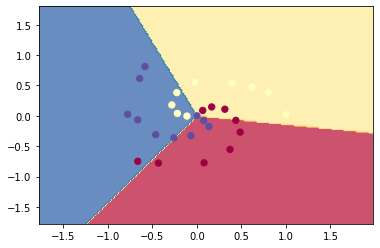

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')